## 2. Descriptive Analysis
For descriptive analysis, predominantly Pandas is used for data transformation, in conjunction with some useful visualization libraries, which help understanding of the obtained data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import statsmodels.api as sm

def parse_time_value(time_string):
    # Parse the time string value and interpret it in seconds
    try:
        time_split = time_string.split(':')
        return int(time_split[0]) * 60.0 + float(time_split[1])
    except AttributeError:
        return time_string

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
file_directory = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '')) + '\\'
race_df = pd.read_csv(file_directory + 'data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv(file_directory + 'data/horse.csv', low_memory=False, index_col=0)
individual_df = pd.read_csv(file_directory + 'data/individual.csv', low_memory=False, index_col=0)
trainer_df = pd.read_csv(file_directory + 'data/trainer.csv', low_memory=False, index_col=0)
jockey_df = pd.read_csv(file_directory + 'data/jockey.csv', low_memory=False, index_col=0)

## 2.1 Race

### 2.1.1 Race Dataframe 

In [2]:
# Do some type transformation for certain columns
race_df['run_time'] = race_df['run_time'].apply(lambda x: parse_time_value(x))
race_df['distance'] = race_df['distance'].apply(lambda x: re.search(r'(\d+)m', x).group(1)).astype(int)

# Overview of the dataframe structure
race_df.sample(n=5).T

,539494,703400,173031,120670,552233
run_date,2011-06-04,2014-09-28,2003-11-08,2002-08-04,2011-08-28
place,東京,阪神,東京,新潟,札幌
race,1R,11R,12R,9R,2R
title,3歳未勝利,神戸新聞杯(G2),立冬特別(1000万下),信濃川特別(1000万下),3歳未勝利
type,ダ,芝,芝,芝,ダ
track,左,右,左,左,右
distance,1400,2400,1800,2000,1700
weather,晴,晴,晴,晴,晴
condition,良,良,良,良,良
time,10:10,15:35,16:05,14:25,10:25


In [3]:
# Describe the numerical variables
race_df.describe()

,distance,bracket,horse_number,jockey_weight,run_time,run_time_last_600,win_odds,win_fav,horse_id,jockey_id,trainer_id
count,857942.000000,857942.000000,857942.000000,857942.000000,857942.000000,857932.000000,857942.000000,857942.000000,8.579420e+05,857942.000000,857942.000000
mean,1628.745749,4.761040,7.854784,54.977496,101.320120,36.558981,65.719153,7.824347,2.005082e+09,1229.094017,729.306952
std,432.622300,2.268133,4.441266,1.799887,30.068917,4.678954,94.062483,4.426327,5.349266e+06,1145.828448,506.632258
min,1000.000000,1.000000,1.000000,47.000000,53.700000,12.700000,1.000000,1.000000,1.986102e+09,140.000000,101.000000
25%,1200.000000,3.000000,4.000000,54.000000,75.100000,35.600000,8.700000,4.000000,2.000109e+09,706.000000,374.000000
50%,1600.000000,5.000000,8.000000,55.000000,99.400000,37.000000,25.700000,8.000000,2.005104e+09,1031.000000,1001.000000
75%,1800.000000,7.000000,11.000000,56.000000,115.500000,38.600000,82.300000,11.000000,2.009109e+09,1102.000000,1057.000000
max,4260.000000,8.000000,18.000000,66.000000,326.400000,99.800000,999.900000,18.000000,2.015110e+09,5551.000000,5717.000000


### 2.1.2 Race Condition 

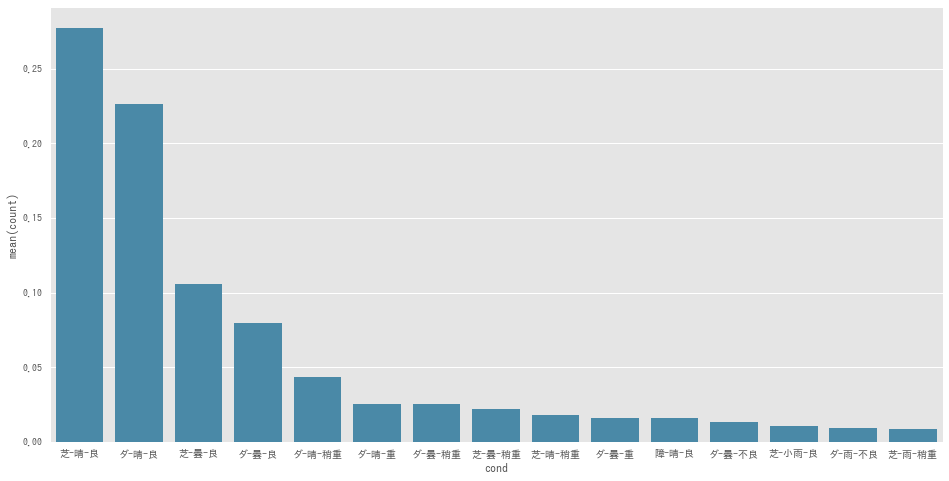

In [4]:
# Count the different race conditions
race_count = race_df.groupby(['type', 'weather', 'condition']).agg({'run_date': 'count'}).reset_index()
race_count.columns = ['type', 'weather', 'condition', 'count']
race_count['count'] = race_count['count'] / race_count['count'].sum()
race_count['cond'] = race_count['type'].str.cat(race_count['weather'], sep='-').str.cat(race_count['condition'], sep='-')
race_count_sorted = race_count.sort_values('count', ascending=False)[:15]
sns.barplot(y='count', x='cond', data=race_count_sorted, color='#3A8FB7')

### 2.1.3 Time and Distance

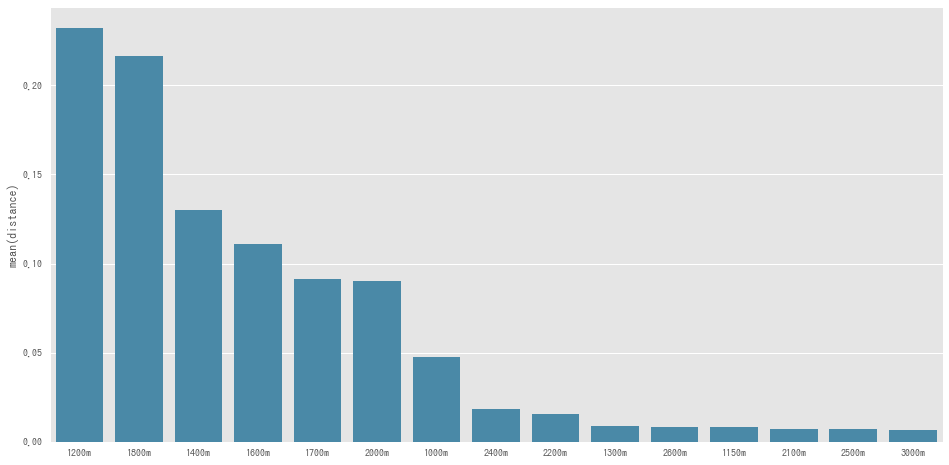

In [5]:
# Get the top run distance among the events
distance_count = race_df['distance'].value_counts()[:15]
distance_count.index = list(map(lambda x: '%sm' % str(x), distance_count.index))
sns.barplot(x=distance_count.index, y=distance_count/distance_count.sum(), color='#3A8FB7')

                            OLS Regression Results                            
Dep. Variable:               run_time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.202e+08
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:43:14   Log-Likelihood:            -2.5579e+06
No. Observations:              857942   AIC:                         5.116e+06
Df Residuals:                  857941   BIC:                         5.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0627   3.06e-06   2.05e+04      0.0

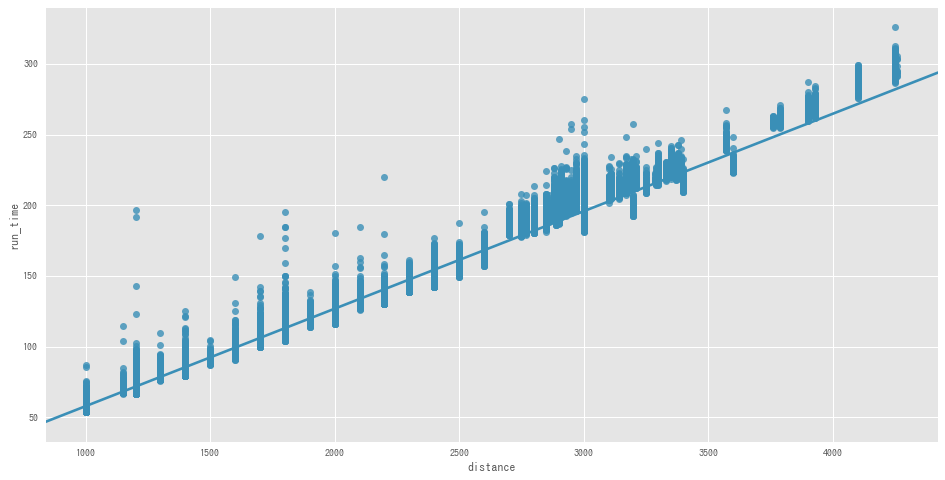

In [6]:
# Get the relationship between time and distance
dist_time = sm.OLS(race_df['run_time'], sm.add_constant(race_df['distance']))
dist_time_re = dist_time.fit()
print(dist_time_re.summary())
sns.regplot(y='run_time', x='distance', data=race_df, color='#3A8FB7')

## 2.2 Horse

### 2.2.1 Horse Dataframe 

In [7]:
# Do some type transformation for certain columns
horse_df['gender'] = horse_df['gender'].apply(lambda x: x[0])

# Overview of the dataframe structure
horse_df.sample(n=5).T

,29234,659,27951,56732,22633
horse_id,2003101156,1995109018,2003104880,2009101137,2001102199
horse_name,トッケンショウブ,ゲイリーファルコン,パープルスピーチ,ジグパルティード,シルクトリガー
date_of_birth,2003年4月19日,1995年4月30日,2003年3月22日,2009年3月7日,2001年2月25日
trainer,田中章博 (栗東),志村文雄 (岩手),境直行 (栗東),田中剛 (美浦),山田勇 (佐賀)
owner,小田切有一,吉岡秀宜,中野銀十,高樽さゆり,曾我雅
breeder,川端牧場,Vincenza Angeloni & Respite Farm,静内フジカワ牧場,斉藤政志,早田牧場新冠支場
place_of_birth,三石町,米,静内町,浦河町,新冠町
transaction_price,-,-,-,210万円 (2010年 北海道オータムセール),-
prize_obtained,"3,536万円 (中央)","1,540万円 (中央) /588万円 (地方)",143万円 (地方),39万円 (地方),"2,174万円 (中央) /32万円 (地方)"
race_record,44戦2勝 [ 2-3-2-37 ],120戦9勝 [ 9-9-11-91 ],81戦6勝 [ 6-6-5-64 ],13戦2勝 [ 2-1-1-9 ],35戦1勝 [ 1-4-4-26 ]


In [8]:
# Describe the columns of the dataframe
horse_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
horse_id,86898,NaN,NaN,NaN,2.00581e+09,5.64675e+06,1.9861e+09,2.0011e+09,2.0061e+09,2.0111e+09,2.01511e+09
horse_name,86898,85820,キャロル,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,86898,3905,2002年4月3日,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trainer,86896,2064,(地方),542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,86894,6510,サンデーレーシング,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breeder,86876,4264,ノーザンファーム,4750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,86895,106,浦河町,16137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_price,86898,7779,-,68212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize_obtained,86898,30912,0万円,14794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_record,86898,22588,2戦0勝 [ 0-0-0-2 ],3642,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2.2 Gender and Breed 

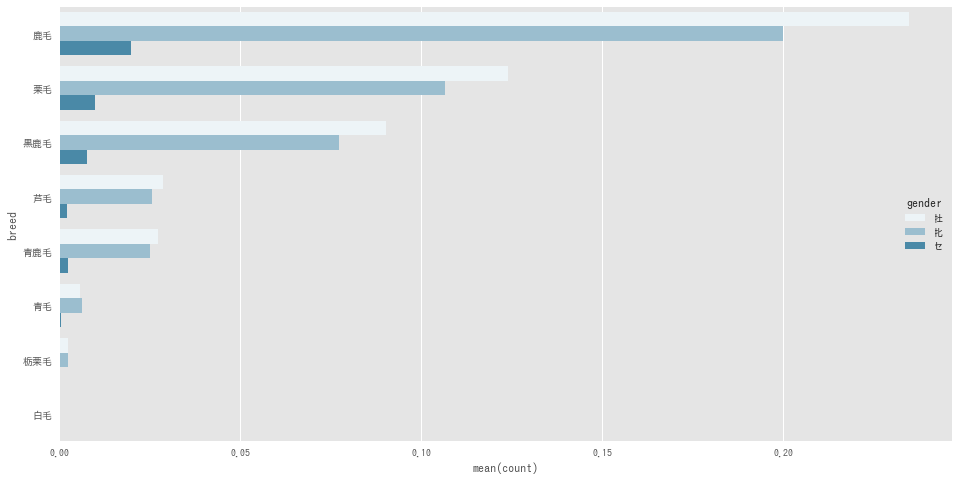

In [9]:
# Get gender and breed information
breed_gender_count = horse_df.groupby(['breed', 'gender']).agg({'horse_name': 'count'}).reset_index()
breed_gender_count.columns = ['breed', 'gender', 'count']
breed_gender_count = breed_gender_count.sort_values('count', ascending=False)
breed_gender_count['count'] = breed_gender_count['count'] / breed_gender_count['count'].sum()
sns.barplot(x='count', y='breed', data=breed_gender_count, color='#3A8FB7', hue='gender')

### 2.2.3 Horse and Run Time

In [10]:
# Merge race and horse dataframe and alter datetime type of information
horse_race = race_df.merge(horse_df, left_on='horse_id', right_on='horse_id')
horse_race['run_date'] = horse_race['run_date'].str.cat(horse_race['time'], sep=' ').apply(lambda x: pd.Timestamp(x))
horse_race['date_of_birth'] = horse_race['date_of_birth'].apply(lambda x: pd.Timestamp('-'.join(re.findall(r'\d+', x))))
horse_race['curr_age'] = horse_race['run_date'].subtract(horse_race['date_of_birth']).dt.days / 365.0

# Replace abnormal age value by the original sex/age string
# ori_age = horse_race['sex_age'].apply(lambda string: float(string[1]))
# age_diff = horse_race['curr_age'] - ori_age
# horse_race.loc[abs(age_diff) > 1, 'curr_age'] = ori_age
horse_race.sample(n=5).T

,576977,495644,455055,379030,542723
run_date,2015-01-18 15:25:00,2009-04-18 11:00:00,2008-07-20 12:00:00,2010-10-10 11:45:00,2012-05-19 16:01:00
place,中京,中山,新潟,東京,新潟
race,11R,3R,5R,4R,12R
title,長篠S(1600万下),3歳未勝利,2歳新馬,障害3歳上未勝利,荒川峡特別(500万下)
type,芝,ダ,ダ,障,芝
track,左,右,左,芝,左
distance,1200,1200,1200,3000,2000
weather,晴,曇,曇,曇,晴
condition,良,良,良,不良,良
time,15:25,11:00,12:00,11:45,16:01


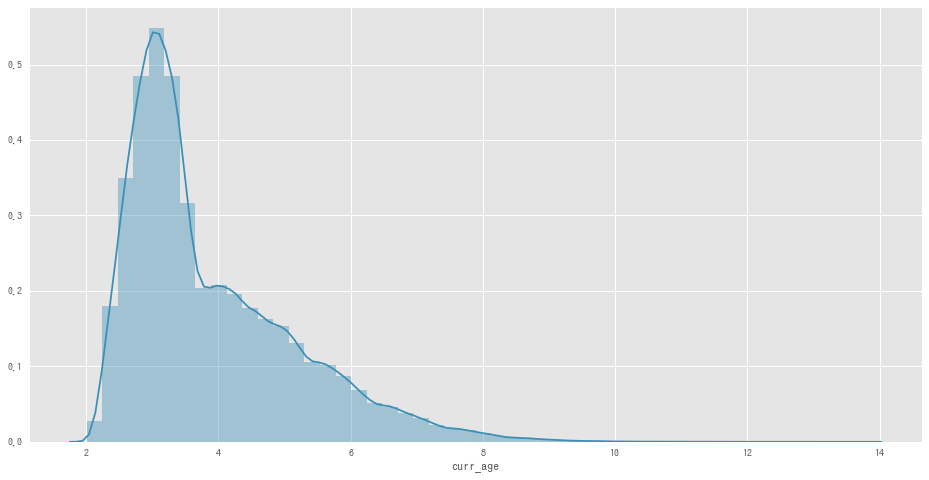

In [11]:
# Get the histogram of horse age relative to the run date and time
sns.distplot(horse_race['curr_age'], color='#3A8FB7')

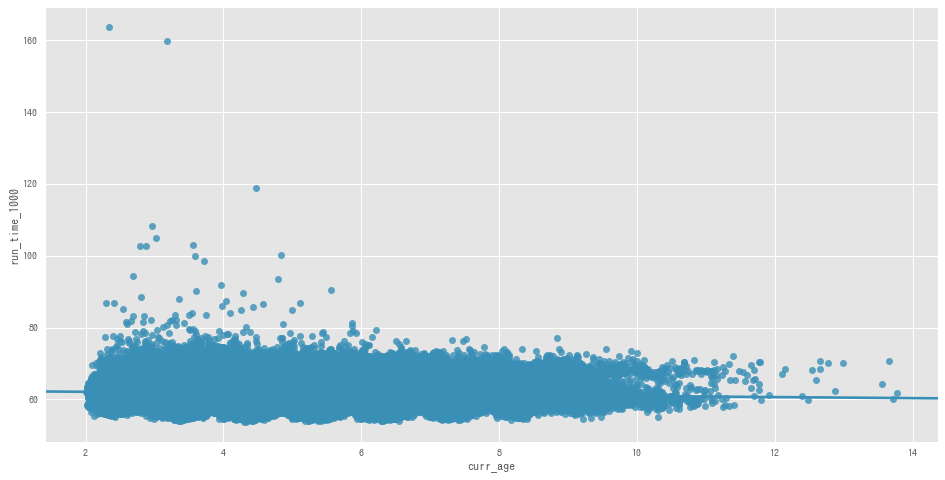

In [12]:
horse_race['run_time_1000'] = horse_race['run_time'] / (horse_race['distance'] / 1000)
sns.regplot(x='curr_age', y='run_time_1000', data=horse_race, color='#3A8FB7')

## 2.3 Individuals

In [13]:
# Do some type transformation for certain columns
for columns in list(individual_df.columns)[2:-1]:
    individual_df[columns] = individual_df[columns].apply(lambda x: x.replace(',', '') 
                                                          if type(x) not in [int, float] else x)

# Overview of the dataframe structure
individual_df.sample(n=5).T

,89969,31632,38904,105593,97729
individual_id,442008,830317,930034,403069,063030
individual_type,馬主,生産者,生産者,生産者,馬主
name,木谷ツヤ,森牧場,帰山敏夫,山本昇寿,中村敏明
year,2004,2015,1997,2013,2007
rank,1170,638,1336,893,1111
first,0,0,0,0,0
second,0,1,0,0,0
third,0,3,0,0,0
out,4,17,16,17,2
races_major,0,0,0,0,0


In [14]:
# Describe the columns of the dataframe
individual_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,103486.0,2002.737018,8.656180,1986.0,1996.0,2003.000,2010.000,2018.0
rank,103486.0,654.773129,446.273863,1.0,228.0,619.000,1055.000,1547.0
first,103421.0,3.636321,11.365576,0.0,0.0,1.000,3.000,592.0
second,103421.0,3.626807,10.436554,0.0,0.0,1.000,3.000,517.0
third,103421.0,3.622069,9.819704,0.0,0.0,1.000,3.000,437.0
races_major,103421.0,1.901142,7.533371,0.0,0.0,0.000,1.000,476.0
wins_major,103421.0,0.134064,0.803265,0.0,0.0,0.000,0.000,51.0
wins_special,103421.0,0.837586,3.088580,0.0,0.0,0.000,1.000,170.0
wins_flat,103421.0,2.664672,7.878645,0.0,0.0,1.000,2.000,385.0
wins_grass,103421.0,1.768471,6.587319,0.0,0.0,0.000,1.000,431.0


## 2.4 Jockey and Trainer Profile 

In [15]:
# Do some type transformation for certain columns
for columns in trainer_df.columns:
    trainer_df[columns] = trainer_df[columns].apply(lambda x: np.nan if x == 'null' else x)

for columns in jockey_df.columns:
    jockey_df[columns] = jockey_df[columns].apply(lambda x: np.nan if x == 'null' else x)
    if columns in ['height', 'weight']:
        jockey_df[columns] = jockey_df[columns].apply(lambda x: x if pd.isnull(x) else re.search(r'\d+', x).group(0))
        jockey_df[columns] = jockey_df[columns].astype(float)

# Overview of the dataframe structure
trainer_df.sample(n=5).T

,967,121,265,232,542
trainer_id,5686,371,5269,1022,5392
trainer_name,[外]ブリーン,[東]小林常泰,[地]原定弘,[西]石坂正,[地]池田孝
date_of_birth,1969/05/13,1945/02/17,1953/10/24,1950/12/24,1967/02/21
place_of_birth,地方,長野県,地方,佐賀県,地方
first_run_date,NaN,1986/03/15,NaN,1998/03/07,NaN
first_run_horse,NaN,ダービータクト,NaN,ダンツチャージ,NaN
first_win_date,NaN,1986/04/19,NaN,1998/03/21,NaN
first_win_horse,NaN,ダービータクト,NaN,ダンツチャージ,NaN


In [16]:
# Overview of the dataframe structure
jockey_df.sample(n=5).T

,401,48,55,88,293
jockey_id,5295,5212,591,673,400
jockey_name,板倉範明,Ｍデムー,田中剛,岸滋彦,国信満
date_of_birth,1981/07/02,1979/01/11,1961/02/13,1969/12/04,1955/07/26
place_of_birth,地方,イタリア,東京都,地方,地方
blood_type,NaN,A型,A型,NaN,NaN
height,NaN,158,162,NaN,NaN
weight,NaN,52,55,NaN,NaN
first_flat_run_date,2001/09/02,1999/12/04,1979/03/03,1988/03/05,1992/06/14
first_flat_run_horse,サンポンド,コウユーラヴ,アローキングダム,トリプレックス,ダンサーズクロス
first_flat_win_date,NaN,1999/12/04,1979/05/13,1988/03/12,1999/08/07


In [17]:
# Describe the columns of the dataframe
trainer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trainer_id,1021.0,3580.235064,2302.371476,101.0,1020.0,5181.0,5460.0,5717.0


In [18]:
# Describe the columns of the dataframe
jockey_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
jockey_id,807,NaN,NaN,NaN,3321.83,2224.18,140,1010.5,5089,5346.5,5551
jockey_name,807,801,ライ,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,807,780,1990/12/27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,807,41,地方,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_type,229,4,A型,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,236,NaN,NaN,NaN,161.614,4.25562,149,159,162,164,174
weight,236,NaN,NaN,NaN,48.4619,3.01532,43,46,47,51,59
first_flat_run_date,735,424,1996/03/02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_run_horse,735,727,トゥインチアズ,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_date,453,405,2009/12/05,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
race_df.to_csv('data/race.csv', encoding='utf-8')
horse_df.to_csv('data/horse.csv', encoding='utf-8')
individual_df.to_csv('data/individual.csv', encoding='utf-8')
trainer_df.to_csv('data/trainer.csv', encoding='utf-8')
jockey_df.to_csv('data/jockey.csv', encoding='utf-8')
horse_race.to_csv('data/horse_race.csv', encoding='utf-8')